## Analysis of Sales, Profit, and Shipping Modes Across Regions and Customer Segments

**Briefing:**

This analysis aims to explore key trends and patterns within the sales data, focusing on the influence of shipping modes, regional performance, and customer segmentation.  We will address the following questions:

1. **Shipping Mode Variation by Region:** How do different shipping modes (e.g., Standard Class, Second Class, etc.) vary across different regions (e.g., West, East, Central) in terms of their contribution to both sales and profit?  This will help us understand if certain shipping modes are more prevalent or profitable in specific regions.

2. **Top Performing Sub-Categories by Region:** Which sub-categories (e.g., Copiers, Chairs, etc.) generate the highest total profit within each region? Identifying these top performers will reveal which product categories are most successful in different geographic areas. We will specifically identify the top 3 sub-categories in each region.

3. **Sales and Profit Distribution Across Customer Segments:** How are sales and profit distributed across different customer segments (Consumer, Corporate, Home Office)? This will help us understand the relative contribution of each customer segment to overall revenue and profitability.  We will also examine how average discount varies across these segments.

**Methodology:**

To answer these questions, we will employ the following methods:

1. **Data Grouping and Aggregation:** We will group the data by region and shipping mode to calculate the sum of sales and profit for each combination.  This will allow us to analyze the relationship between these variables.

2. **Top Sub-Category Identification:** We will group the data by region and sub-category, calculate the total profit for each group, and then use ranking or filtering techniques to identify the top 3 sub-categories within each region.

3. **Customer Segment Analysis:** We will group the data by customer segment and calculate the sum of sales and profit for each segment.  We will also calculate the average discount offered to each segment.

**Expected Outcomes:**

This analysis is expected to provide insights into:

* The distribution of shipping modes across regions and their impact on sales and profit.
* The top-performing sub-categories in each region, highlighting potential areas of strength and opportunity.
* The relative contribution of different customer segments to overall sales and profit.
* The relationship between discounts and profitability across customer segments.

These insights will be valuable for making informed business decisions related to logistics, marketing, product development, and customer relationship management.

In [66]:
# Importing the packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Loading the csv file while also removing any duplicated and missing values
store_data = pd.read_csv('SampleSuperstore.csv').drop_duplicates().dropna(how = 'all', axis = 1)
display(store_data.head(10))

# Checking for the info of the data
store_data.info()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


The store_data has no missing values but we did see some duplicated values tho, we had a total number of 9994 rows but due to the duplicated values it went down to 9977 and yeah it was 17 duplicated values. The datatypes are in order and i don't need to do any modifications

<Axes: >

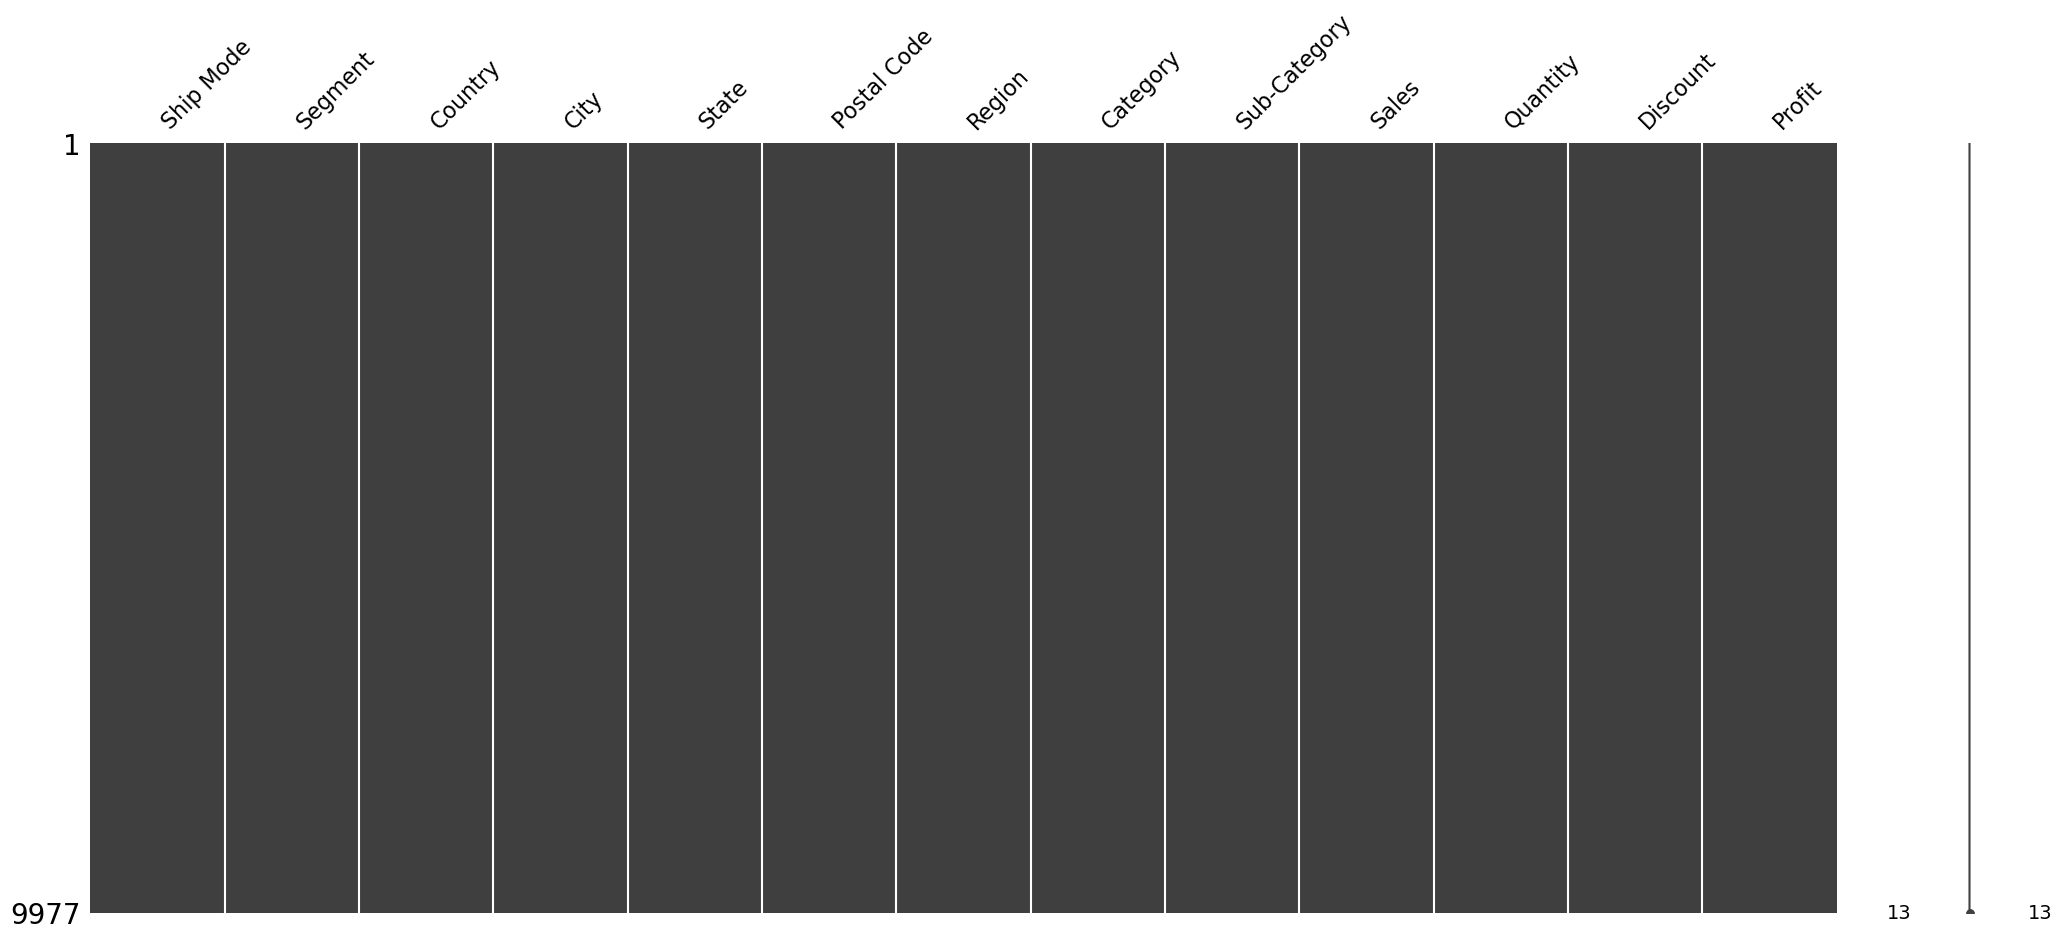

In [67]:
# Checking for missing values in the data
msno.matrix(store_data)

The chart above confirms that the dataset has no missing values. However, to ensure the integrity of our analysis, we will proceed with a thorough validation of the data.

# Validating the data

In [68]:
# Checking the unique values of categorical data in store_data
unq_cate_data = store_data.describe(include = 'object')
display(unq_cate_data)

# Checking the unique values of the numerical data in the store_data
unq_num_data = store_data.describe()
display(unq_num_data)

# Checking to see if all the listed states are all actually there
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
    "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"
]

# Find the missing state
missing_states = set(states) - set(store_data['State'].unique())
print("Missing states:", missing_states)


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


Missing states: {'Hawaii', 'Alaska'}


After validating the store_data, I found that the City column contains 531 unique cities. Upon further inspection, I confirmed that there are no misspelled city names. However, the State column has only 49 unique values, indicating that the dataset does not cover all the states in the United States. Specifically, Hawaii and Alaska are missing from the dataset.

For reference, there are 50 states in the United States. Some of the most well-known ones include California, Texas, New York, and Florida. The last two states to join were:

Alaska (49th state) in 1959
Hawaii (50th state) in 1959
Thus, both Hawaii and Alaska are not included in the data.


# Now it's time to Analyze the data
## How do shipping modes vary by region in terms of sales and profit?



                              Sales      Profit
Ship Mode      Region                          
First Class    Central   58698.9634   3691.0834
               East     113587.0530  15732.0141
               South     49332.5660   6892.3854
               West     129761.8885  22638.1732
Same Day       Central   20415.4100   1531.8797
               East      43326.8320   7980.2670
               South     21017.1730  -1762.3350
               West      43562.3100   8122.0752
Second Class   Central  103546.4414   9121.0719
               East     116545.5240  10787.2908
               South     93758.6125  14667.1469
               West     145326.4675  22871.1420
Standard Class Central  318122.0380  25311.8402
               East     404975.7870  57006.7373
               South    227613.5535  26952.2330
               West     406604.9705  54698.4175


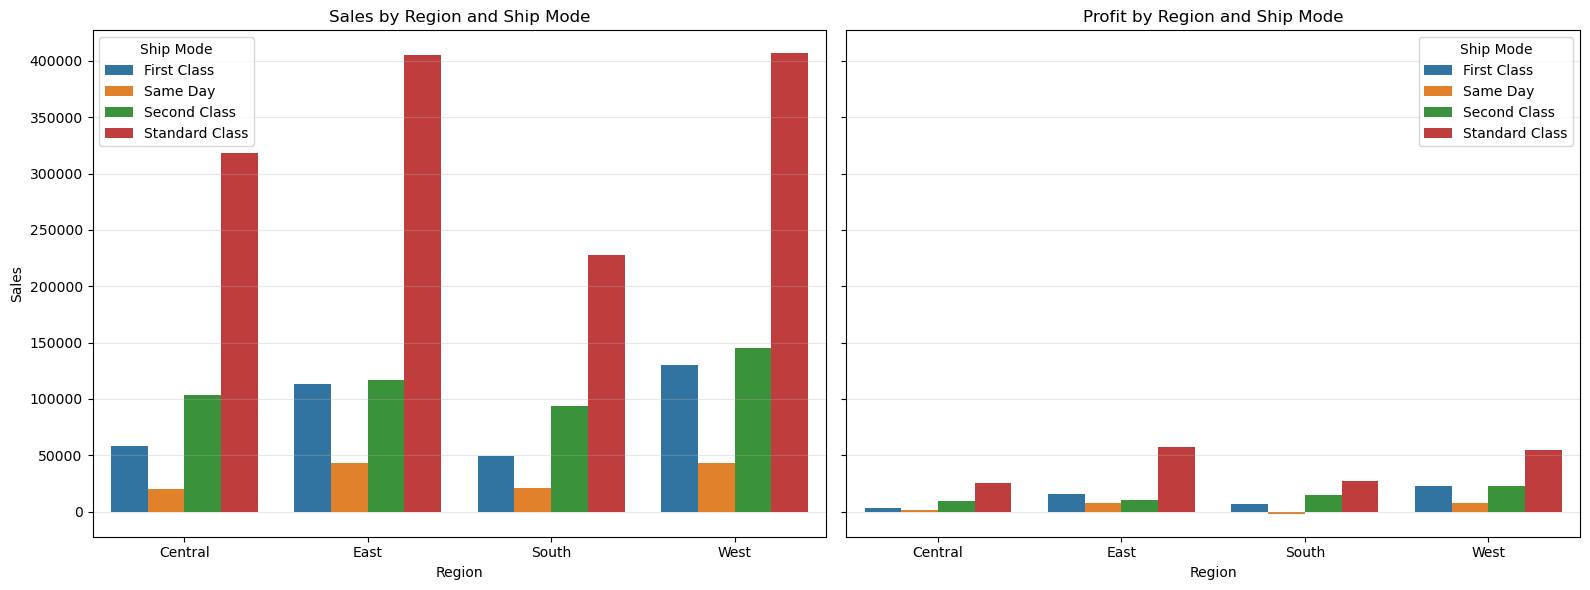

In [69]:
# Shipping modes with region in terms of sales and profit
sm_sp = store_data.groupby(['Ship Mode', 'Region'])[['Sales', 'Profit']].sum()
print(sm_sp)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Sales
sns.barplot(data=sm_sp.reset_index(), x='Region', y='Sales', hue='Ship Mode', ax=axes[0])
axes[0].set_title('Sales by Region and Ship Mode')
axes[0].grid(axis='y', alpha = 0.3)

# Plot Profit
sns.barplot(data=sm_sp.reset_index(), x='Region', y='Profit', hue='Ship Mode', ax=axes[1])
axes[1].set_title('Profit by Region and Ship Mode')
axes[1].grid(axis = 'y', alpha = 0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Analysis: How Shipping Modes Vary by Region in Terms of Sales and Profit
## 1. Sales by Region and Ship Mode
**Standard Class** dominates sales across all regions, with the **West region recording the highest sales**, followed by the **East region**.
**Second Class and First Class** have moderate sales across all regions but show no significant regional bias.
**Same Day** shipping mode consistently has the lowest sales in all regions.
## 2. Profit by Region and Ship Mode
Despite high sales, **Standard Class** shows relatively low profit margins across regions.
**First Class and Second Class** generate modest but more **consistent profit levels in comparison to Standard Class.**
**Same Day** shipping mode, while having the **lowest sales**, still contributes positively to profit across all regions.
**West region** stands out as the **most profitable overall**, particularly for S**tandard Class and Second Class shipping**.
## Key Insights
**Standard Class** is the most popular shipping mode in terms of sales but has **lower profitability**, indicating possible high costs or discounts.
**Second Class and First Class** balance both sales and profit, making them potentially more **efficient shipping options**.
**Same Day shipping is underutilized**, but it maintains a positive profit contribution, suggesting it could be worth expanding in specific regions.



# Identify the top 3 sub-categories with the highest total profit in each region.

  Sub-Category   Region      Profit
0      Copiers     West  19327.2351
1      Copiers     East  17022.8418
2  Accessories     West  16484.5983
3      Binders     West  16096.8016
4      Copiers  Central  15608.8413
5       Phones  Central  12323.0267
6       Phones     East  12314.6860
7        Paper     West  12060.0632
8      Binders     East  11267.9346
9  Accessories     East  11195.8644


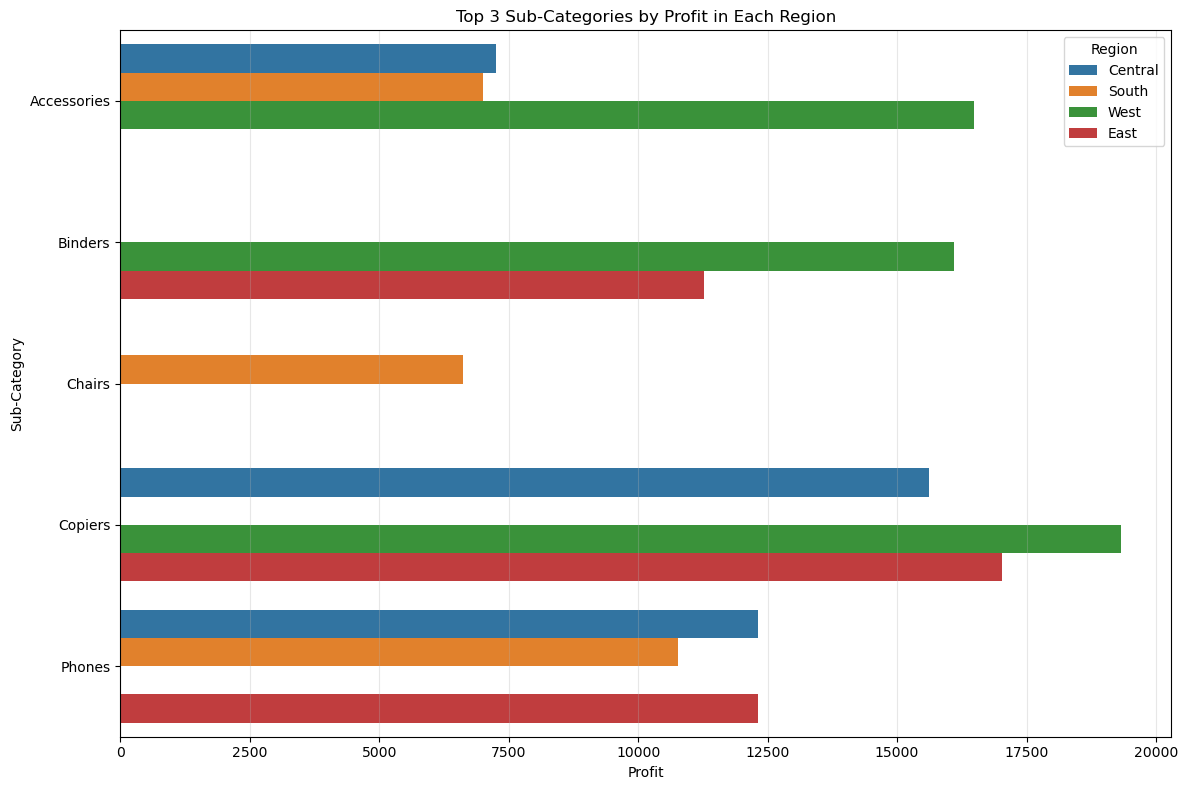

In [70]:
# Identify the top 3 sub-categories with the highest total profit in each region.
top_sub_cat = store_data.groupby(['Sub-Category', 'Region'])['Profit'].sum().sort_values(ascending = False)
print(top_sub_cat.reset_index().head(10))

# Get Top 3 per Region (using rank)
top_sub_cat = store_data.groupby(['Sub-Category', 'Region'])['Profit'].sum().reset_index()
top_sub_cat['rank'] = top_sub_cat.groupby('Region')['Profit'].rank(ascending = False, method = 'dense') # Rank within each region
top_3_per_region = top_sub_cat[top_sub_cat['rank'] <= 3] # Filter to top 3

# Visualization (Seaborn Bar Plot)
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Profit', y='Sub-Category', hue = 'Region', data = top_3_per_region, orient = 'h')
plt.title('Top 3 Sub-Categories by Profit in Each Region')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.grid(axis = 'x', alpha = 0.3)
plt.tight_layout()
plt.show()

## Analysis of Profit Distribution Across Sub-Categories and Regions

**Objective:** To analyze profit distribution across sub-categories and regions, identify key performance trends, and uncover potential opportunities for growth and improvement.

**Key Findings:**

* **Western Region Dominance:** The Western region stands out as a high-performing market, exhibiting significant profitability across multiple sub-categories.
  
* **Copiers Lead the Way:** Within the Western region, the "Copiers" sub-category demonstrates the highest profitability, generating a total profit of $19,327. This suggests a strong market presence and potentially high demand for copiers in this region.

  
* **Strong Performance of Accessories and Binders:**  "Accessories" and "Binders" also perform exceptionally well in the Western region, achieving profits of $16,485 and 16,097, respectively.

* **Concentration of Top Performers:** The concentration of top-performing sub-categories within the West region indicates a potentially lucrative market and warrants further investigation to understand the factors driving this success.

**Insights:**

The strong performance of the Western region, particularly in the "Copiers," "Accessories," and "Binders" sub-categories, suggests favorable market conditions, effective sales strategies, or a combination of both.  This concentration of profitability in one region presents both an opportunity and a challenge.


**Conclusion:**

The analysis reveals valuable insights into profit distribution across sub-categories and regions. The Western region's strong performance highlights the potential for growth and profitability in this market. By understanding the factors driving this success and addressing underperforming areas, the company can optimize its sales strategies and maximize overall profitability.

#  Analyze how Sales and Profit are distributed across different customer segments (Segment)

In [71]:
# Calculate the sum of Sales and Profit for each segment
customer_segment = store_data.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
display(customer_segment)

# Calculate the average Discount for each segment
avg_customer_dis = store_data.groupby('Segment')['Discount'].mean().reset_index()
print(avg_customer_dis)

,Segment,Sales,Profit
0,Consumer,1.160833e+06,134007.4413
1,Corporate,7.060701e+05,91954.9798
2,Home Office,4.292927e+05,60279.0015


       Segment  Discount
0     Consumer  0.158308
1    Corporate  0.158159
2  Home Office  0.147178


In [72]:
display(store_data)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Analysis of Sales and Profit Distribution Across Customer Segments

**Objective:** To analyze the distribution of Sales and Profit across different customer segments (Consumer, Corporate, and Home Office) and examine the relationship between these metrics and the average discount offered to each segment.

**Key Findings:**

* **Consumer Segment Dominance in Sales:** The Consumer segment exhibits the highest sales figures, reaching $1,160,833. This significantly surpasses the sales of the Corporate and Home Office segments.

* **Corporate Segment as Second Highest in Sales:** The Corporate segment holds the second-highest sales at $706,070, demonstrating a substantial contribution to overall revenue.

* **Home Office Segment Sales Lag:** The Home Office segment reports the lowest sales figures, totaling $429,293.

* **Profit Trends Mirror Sales (with Less Variation):** While the profit distribution generally follows the sales trend, the differences between segments are less pronounced compared to sales.  The Consumer segment still leads in profit, but the gap is smaller.

* **Similar Average Discounts for Consumer and Corporate:** The Consumer and Corporate segments have nearly identical average discounts of approximately 15.8%.

* **Slightly Lower Average Discount for Home Office:** The Home Office segment receives a slightly lower average discount of 14.7%.


**Insights:**

The substantial difference in sales between the Consumer segment and the other two segments suggests a potential market focus or customer base heavily weighted towards individual consumers.  The relatively smaller variation in profit across segments, compared to sales, may indicate differences in product mix, pricing strategies, or cost structures for each segment.  The similar average discounts for Consumer and Corporate segments may reflect similar purchasing patterns or negotiation power. The slightly lower discount for the Home Office segment could be due to different purchasing volumes or product types.


**Conclusion:**

The analysis reveals valuable insights into the distribution of sales and profit across customer segments. The Consumer segment's strong performance highlights its importance to the business.  By understanding the factors driving sales and profit in each segment and optimizing discount strategies, the company can enhance overall profitability and achieve sustainable growth.  Further investigation into the differences between sales and profit variation is recommended to gain a deeper understanding of segment performance.

## Summary for Analysis of Sales and Profit Patterns

This analysis explored sales and profit patterns within a store dataset, focusing on shipping modes, regional performance, and customer segmentation.

**Data Cleaning:**

Data cleaning revealed minimal data quality issues. Only 17 duplicate entries were removed.  It was also noted that the dataset does not include data for Hawaii and Alaska.

**Key Findings:**

**Shipping Modes:**

* "Standard Class" dominated sales across all regions, but exhibited lower profitability.
* "Second Class" and "First Class" shipping offered a better balance between sales and profit.
* "Same Day" shipping, despite low sales, maintained positive profit contributions.
* The West region emerged as the most profitable overall.

**Sub-Category and Regional Profit Distribution:**

* The Western region demonstrated strong performance, particularly with "Copiers," "Accessories," and "Binders."
* This concentration of high-performing sub-categories in the West suggests a lucrative market.

**Customer Segmentation:**

* The Consumer segment significantly outperformed the Corporate and Home Office segments in sales.
* Profit trends generally mirrored sales, but the variation was less pronounced.
* Consumer and Corporate segments received similar average discounts (15.8%), slightly higher than the Home Office segment (14.7%).

**Conclusion:**

The analysis identified key trends and patterns in sales and profit data. The Western region's strong performance and the dominance of the Consumer segment present significant opportunities.

**Recommendations:**

* Further investigation is recommended into the drivers behind the successes in the Western region and the Consumer segment.
* Evaluation of shipping mode efficiency and discount strategies is recommended to optimize profitability and drive sustainable growth.

### To Be Continued